<a href="https://colab.research.google.com/github/ANNASBlackHat/Basic-Classification/blob/master/basic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install -q tensorflow==2.0.0-alpha0

     |████████████████████████████████| 79.9MB 69.4MB/s 
     |████████████████████████████████| 3.0MB 30.7MB/s 
     |████████████████████████████████| 419kB 46.5MB/s 
     |████████████████████████████████| 61kB 22.7MB/s 


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
#tensorflow and keras
import tensorflow as tf
from tensorflow import keras

#helper library
import numpy as np
import matplotlib.pyplot as plt

In [8]:
print(tf.__version__)

1.13.1


In [0]:
#download dataset - using MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
#The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore Data

In [11]:
#The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels
train_images.shape

(60000, 28, 28)

In [15]:
#Likewise, there are 60,000 labels in the training set
len(train_labels)

60000

In [16]:
#Each label is an integer between 0 and 9
train_lables

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
#There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels
test_images.shape

(10000, 28, 28)

## Process The Data

The data must be preprocessed before training the network,  If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255

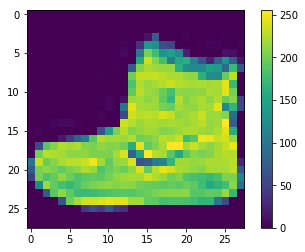

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, we divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

To verify that the data is in the correct format and that we're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

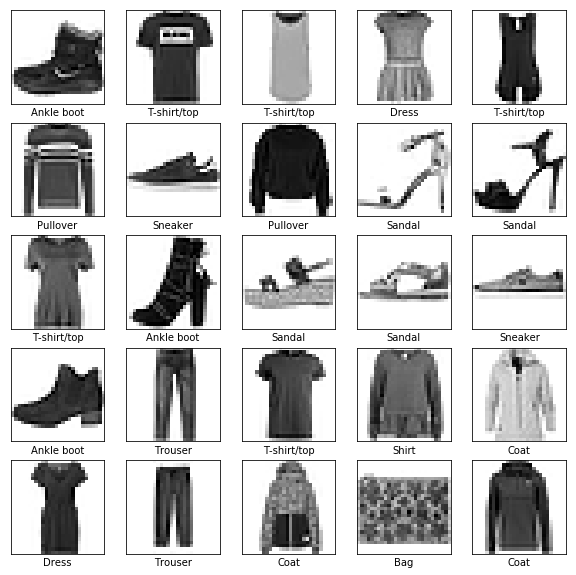

In [26]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

## Build The Model
Building the neural network requires configuring the layers of the model, then compiling the model.

### Setup The Layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.


In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile The Model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

* Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.

* Optimizer —This is how the model is updated based on the data it sees and its loss function.

* Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [0]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])


### Train The Model
Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.

In [30]:
#To start training, call the model.fit method—so called because it "fits" the model to the training data
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.4969 - acc: 0.8258
Epoch 2/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3750 - acc: 0.8654
Epoch 3/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3385 - acc: 0.8766
Epoch 4/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3143 - acc: 0.8860
Epoch 5/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2946 - acc: 0.8909


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

## Evaluate Accuracy

In [31]:
#Next, compare how the model performs on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest Accuracy : ', test_acc)

10000/10000 [==============================] - 1s 52us/sample - loss: 0.3437 - acc: 0.8788

Test Accuracy :  0.8788


It turns out that the accuracy on the test dataset is a little less than accuracy on the training dataset. This gap between training accuracy and test accuracy represents *Overfitting*. Overfitting is when a machine learning model performs worse on new, previously unseen inputs on the training data.

## Make Prediction
With the model trained, we can use it to make predictions about some images 

In [32]:
predictions = model.predict(test_images)

#Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:
predictions[0]

array([1.0036387e-05, 3.4244987e-08, 4.3178170e-07, 8.6362770e-06,
       3.8048933e-07, 3.1895697e-02, 1.6053496e-05, 9.8583072e-02,
       3.7384135e-04, 8.6911190e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing

In [33]:
#We can see which label has the highest confidence value:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:

In [35]:
test_labels[0]

9

**We can graph this to look at the full set of 10 channels.**

In [0]:
def plot_image(i, predictions_array, true_label, img) :
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label :
    color = 'blue'
  else :
    color = 'red'    
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                      100 * np.max(predictions_array),
                                      class_names[true_label]),
            color = color)
  
 

In [0]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot= plt.bar(range(10), predictions_array, color= '#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

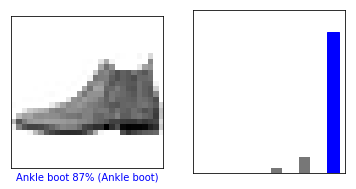

In [42]:
#Let's look at the 0th image, predictions, and prediction array.
i =0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions, test_labels)
plt.show()

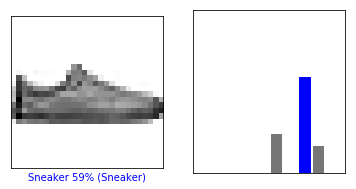

In [49]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions, test_labels)
plt.show()

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label. Note that the model can be wrong even when very confident.

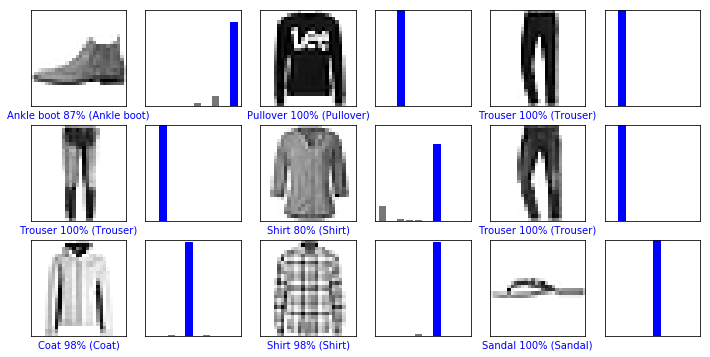

In [50]:
num_rows = 3
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2 * i + 1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()  

Finally, use the trained model to make a prediction about a single image.

In [51]:
#Grab image from the test dataset
img = test_images[0]
print(img.shape)

(28, 28)


***tf.keras*** models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though we're using a single image, we need to add it to a list:



In [52]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [53]:
#Now predict the correct label for this image:
predictions_single = model.predict(img)
print(predictions_single)

[[1.0036378e-05 3.4245055e-08 4.3178090e-07 8.6362688e-06 3.8048972e-07
  3.1895660e-02 1.6053482e-05 9.8582990e-02 3.7384100e-04 8.6911196e-01]]


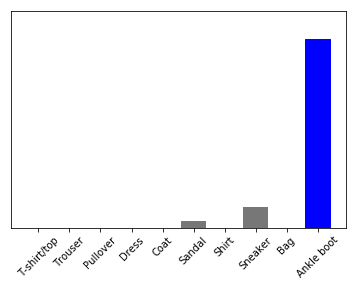

In [54]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

**model.predict** returns a list of lists—one list for each image in the batch of data

In [0]:
#Grab the predictions for our (only) image in the batch:

In [56]:
np.argmax(predictions_single[0])

9

And, as before, the model predicts a label of 9.